In [2]:
from selenium import webdriver
from selenium.webdriver.chrome.options import Options
import time
from selenium.webdriver.common.keys import Keys
from selenium.webdriver.common.action_chains import ActionChains
from selenium.webdriver.support import expected_conditions as EC
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import WebDriverWait
import pandas as pd
import matplotlib.pyplot as plt
from PIL import Image
from selenium.common.exceptions import NoSuchElementException

chrome_options = Options()
Path_Chrome_Driver = r"C:\Users\Lenovo\Desktop\Chrome\chromedriver.exe"
driver = webdriver.Chrome(options=chrome_options, executable_path= Path_Chrome_Driver)

<ipython-input-2-ee49090f90df>:16: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
  driver = webdriver.Chrome(options=chrome_options, executable_path= Path_Chrome_Driver)


In [3]:
baseUrl = r'https://dichvucong.baohiemxahoi.gov.vn/#/dang-ky'
driver.get(baseUrl)

In [4]:
time.sleep(2)
driver.find_element(By.CLASS_NAME, 'mat-flat-button').click()

ElementClickInterceptedException: Message: element click intercepted: Element <button _ngcontent-c13="" color="primary" mat-flat-button="" matsteppernext="" class="mat-flat-button mat-primary" type="submit">...</button> is not clickable at point (69, 452). Other element would receive the click: <div _ngcontent-c2="" class="backdrop full-screen ng-star-inserted" style="border-radius: 0px; background-color: rgba(0, 0, 0, 0.3);"></div>
  (Session info: chrome=96.0.4664.110)
Stacktrace:
Backtrace:
	Ordinal0 [0x00896023+2514979]
	Ordinal0 [0x0082F6B1+2094769]
	Ordinal0 [0x007326C8+1058504]
	Ordinal0 [0x00763399+1258393]
	Ordinal0 [0x007616F8+1251064]
	Ordinal0 [0x0075F4ED+1242349]
	Ordinal0 [0x0075E338+1237816]
	Ordinal0 [0x00753EC7+1195719]
	Ordinal0 [0x00776323+1336099]
	Ordinal0 [0x007538A6+1194150]
	Ordinal0 [0x0077640A+1336330]
	Ordinal0 [0x007859FF+1399295]
	Ordinal0 [0x007761EB+1335787]
	Ordinal0 [0x00752617+1189399]
	Ordinal0 [0x00753479+1193081]
	GetHandleVerifier [0x00A25624+1579748]
	GetHandleVerifier [0x00AD0417+2279639]
	GetHandleVerifier [0x0092473B+527355]
	GetHandleVerifier [0x009237E9+523433]
	Ordinal0 [0x00834BF9+2116601]
	Ordinal0 [0x00839238+2134584]
	Ordinal0 [0x00839372+2134898]
	Ordinal0 [0x00842EB1+2174641]
	BaseThreadInitThunk [0x7645FA29+25]
	RtlGetAppContainerNamedObjectPath [0x77537A9E+286]
	RtlGetAppContainerNamedObjectPath [0x77537A6E+238]


In [5]:
#img_dir =r"C:\Users\Lenovo\Desktop\VSSID\ANHXULY"
img_dir =r"C:\Users\Lenovo\Desktop\VSSID\ANHXULY"
folder_excel = r"C:\Users\Lenovo\Desktop\VSSID\Excel"
# Tên file excel cần xử lý
FileName_Excel = "FILEDVVL_120_110_2019_CHILIEM_REF.xlsx"
result = pd.read_excel(folder_excel + "\\" + FileName_Excel, dtype=str)

Thay đổi vị trí trường i để ứng với vị trí trong dữ liệu Excel

Địa chỉ Email: LamQuocTruong7916356172
Họ tên: Lâm Quốc Trường
Mẫu hình ảnh tham chiếu MT: 2019_0_83_5879A.jpg


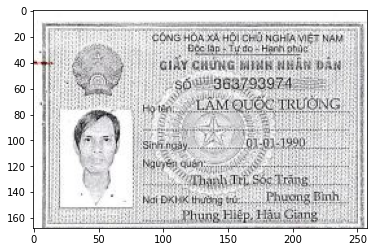

In [460]:
i = 164

hoten = result.loc[i,"hoTen"]
EMAIL = result.loc[i,"Email"]
#EMAIL = result.loc[i,"Email_3"]
Name_Email = EMAIL.split("@")[0]
print("Địa chỉ Email: " + Name_Email)
print("Họ tên: " + hoten)
# print("Mẫu hình ảnh tham chiếu MT: " + str(i+1) + "A.jpg")
# img  = Image.open(img_dir + "\\" +str(i+1) + "A.jpg")
# img = img.resize((800, 600))
print("Mẫu hình ảnh tham chiếu MT: " + result.loc[i,"CMNDMATTRUOC"] + ".jpg")
img  = Image.open(img_dir + "\\" + result.loc[i,"CMNDMATTRUOC"] + ".jpg")
implot = plt.imshow(img)
plt.show()

In [461]:
Ma_BHXH = result.loc[i,"soBhxh"]
CMND = result.loc[i,"soCmnd"]
DC =  result.loc[i,"DC"]
XA = result.loc[i,"maXaLh"]
TINH =  result.loc[i,"maTinhLh"]
HUYEN =  result.loc[i,"maHuyenLh"]
SDT = result.loc[i,"soDienThoai"]

In [462]:
# Xử lý hình ảnh
#link = (r'C:\Users\Lenovo\Desktop\ANHXULY')
# value_truoc = "\\" + str(i) + "A"
# value_sau = "\\" + str(i) + "B"
value_truoc = "\\" +  result.loc[i,"CMNDMATTRUOC"]  
value_sau = "\\" + result.loc[i,"CMNDMATSAU"] 
extendtion = ".jpg"
CMNDTRUOC = img_dir + value_truoc +  extendtion
CMNDSAU = img_dir + value_sau +  extendtion

In [463]:
#driver.find_element_by_id('fileAnhCmndMatTruoc').send_keys(CMNDTRUOC)
driver.find_element(By.ID, 'fileAnhCmndMatTruoc').send_keys(CMNDTRUOC)
time.sleep(2)
WebDriverWait(driver,3).until(EC.element_to_be_clickable((By.XPATH,"//mat-icon[.='photo_size_select_small']"))).click()
WebDriverWait(driver,5).until(EC.element_to_be_clickable((By.XPATH,"//button[./span[text()='Xác nhận']]"))).click()
driver.find_element(By.ID, 'fileAnhCmndMatSau').send_keys(CMNDSAU)
time.sleep(2)
WebDriverWait(driver,3).until(EC.element_to_be_clickable((By.XPATH,"//mat-icon[.='photo_size_select_small']"))).click()
WebDriverWait(driver,5).until(EC.element_to_be_clickable((By.XPATH,"//button[./span[text()='Xác nhận']]"))).click()

In [464]:
#driver.find_element_by_id('mat-input-7').send_keys(hoten)
driver.find_element(By.ID, 'mat-input-7').send_keys(hoten)
driver.find_element(By.ID, 'mat-input-4').send_keys(Ma_BHXH)
driver.find_element(By.ID, 'mat-input-5').send_keys(CMND)
# time.sleep(1)
# driver.find_element(By.ID, 'mat-input-8').send_keys(TINH)
 
WebDriverWait(driver,3).until(EC.element_to_be_clickable((By.ID,"mat-input-8"))).send_keys(TINH)
actions = ActionChains(driver)
actions.send_keys(Keys.TAB)
actions.perform()
time.sleep(0.5)
# driver.find_element(By.ID, 'mat-input-9').send_keys(HUYEN)
WebDriverWait(driver,3).until(EC.element_to_be_clickable((By.ID,"mat-input-9"))).send_keys(HUYEN)
actions = ActionChains(driver) 
actions.send_keys(Keys.TAB)
actions.perform()
time.sleep(0.5)
# driver.find_element(By.ID, 'mat-input-10').send_keys(XA)
WebDriverWait(driver,3).until(EC.element_to_be_clickable((By.ID,"mat-input-10"))).send_keys(XA)
actions = ActionChains(driver) 
actions.send_keys(Keys.TAB)
actions.perform()

driver.find_element(By.ID, 'mat-input-11').send_keys(DC)
driver.find_element(By.ID, 'mat-input-2').send_keys(EMAIL)
driver.find_element(By.ID, 'mat-input-3').send_keys(SDT)
WebDriverWait(driver,10).until(EC.element_to_be_clickable((By.XPATH,"//button[./span[text()='Chọn']]"))).click()
WebDriverWait(driver,10).until(EC.element_to_be_clickable((By.XPATH,"//strong[contains(text(),'[093]')]"))).click()
driver.find_element(By.CLASS_NAME, 'mat-raised-button').click()
# select_city = driver.find_element_by_class_name('mat-raised-button')
# select_city.click()
time.sleep(0.5)
driver.find_element(By.ID, 'mat-input-6').send_keys('')

In [465]:
OTPVALUE = input("Nhập giá trị OTP vào đây")    
if(len(OTPVALUE) == 6): 
    WebDriverWait(driver,1).until(EC.element_to_be_clickable((By.XPATH,"//*[starts-with(@id, 'otp_0_')]"))).send_keys(OTPVALUE[0])
    WebDriverWait(driver,1).until(EC.element_to_be_clickable((By.XPATH,"//*[starts-with(@id, 'otp_1_')]"))).send_keys(OTPVALUE[1])
    WebDriverWait(driver,1).until(EC.element_to_be_clickable((By.XPATH,"//*[starts-with(@id, 'otp_2_')]"))).send_keys(OTPVALUE[2])
    WebDriverWait(driver,1).until(EC.element_to_be_clickable((By.XPATH,"//*[starts-with(@id, 'otp_3_')]"))).send_keys(OTPVALUE[3])
    WebDriverWait(driver,1).until(EC.element_to_be_clickable((By.XPATH,"//*[starts-with(@id, 'otp_4_')]"))).send_keys(OTPVALUE[4])
    WebDriverWait(driver,1).until(EC.element_to_be_clickable((By.XPATH,"//*[starts-with(@id, 'otp_5_')]"))).send_keys(OTPVALUE[5])
    WebDriverWait(driver,1).until(EC.element_to_be_clickable((By.XPATH,"//button[./span[text()='Xác nhận']]"))).click()
    print("Kết thúc hồ sơ thứ " + str(i + 1))                         
else:
    print("Kết thúc hồ sơ thứ " + str(i + 1))           
               

Kết thúc hồ sơ thứ 165


In [466]:
# key = False
# while(key == False):
#     try:
#         if driver.find_element(By.ID, 'body-dialog'):
#             OTPVALUE = input("Nhập giá trị OTP vào đây")    
#             if(len(OTPVALUE) < 6): 
#                 key = True                  
#             else:
#                 WebDriverWait(driver,1).until(EC.element_to_be_clickable((By.XPATH,"//*[starts-with(@id, 'otp_0_')]"))).send_keys(OTPVALUE[0])
#                 WebDriverWait(driver,1).until(EC.element_to_be_clickable((By.XPATH,"//*[starts-with(@id, 'otp_1_')]"))).send_keys(OTPVALUE[1])
#                 WebDriverWait(driver,1).until(EC.element_to_be_clickable((By.XPATH,"//*[starts-with(@id, 'otp_2_')]"))).send_keys(OTPVALUE[2])
#                 WebDriverWait(driver,1).until(EC.element_to_be_clickable((By.XPATH,"//*[starts-with(@id, 'otp_3_')]"))).send_keys(OTPVALUE[3])
#                 WebDriverWait(driver,1).until(EC.element_to_be_clickable((By.XPATH,"//*[starts-with(@id, 'otp_4_')]"))).send_keys(OTPVALUE[4])
#                 WebDriverWait(driver,1).until(EC.element_to_be_clickable((By.XPATH,"//*[starts-with(@id, 'otp_5_')]"))).send_keys(OTPVALUE[5])
#                 WebDriverWait(driver,3).until(EC.element_to_be_clickable((By.XPATH,"//button[./span[text()='Xác nhận']]"))).click()
#                 key = True
#         else:
#             key = False
#     except NoSuchElementException:
#             key = False